In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
riderData = pd.read_csv('BullRiders.csv')

## Pre- Lab
The average American adult male weighs 190 pounds.  Do professional bull-riders in the US weigh the same? 

In [3]:
ridersUSA = riderData[riderData['Country'] == 'USA']
weightUSA = ridersUSA['Weight']
weightMeanUSA = weightUSA.mean()
weightStdUSA = weightUSA.std()

Mean 153.1081081081081
STD 13.023021888144822


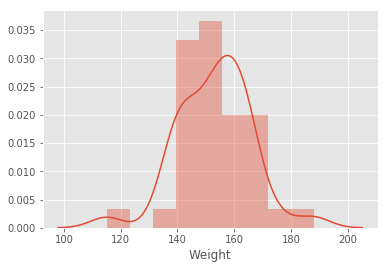

In [4]:
# Distribution of weight of bull riders
print('Mean', weightMeanUSA)
print('STD', weightStdUSA)
sns.distplot(weightUSA)

In [5]:
def calculate_stderr(s, n):
    return s / (n**0.5)

def calculate_tstat(samplemu, mu, stderr):
    return (samplemu - mu) / stderr
  
mu = 190
stderr = calculate_stderr(weightStdUSA, len(ridersUSA))
tprelab = calculate_tstat(weightMeanUSA, mu, stderr)
tprelab

-17.231378369723377

In [6]:
def confidence_interval(mean, stderr, z=1.96):
    """Calculates confidence interval with 95% confidence by default"""
    upperBound = (mean + z * stderr,)
    lowerBound = (mean - z * stderr,)
    return lowerBound + upperBound
  
confInterv = confidence_interval(weightMeanUSA, stderr)
confInterv

#THE NULL HYPOTHESIS IS REJECTED (i.e bull riders do not weight the same (on average) than an american male)

(148.91180375237775, 157.30441246383845)

## Lab
Do professional bull riders stay on their bulls 50% of the time? Test the hypothesis that the mean ride percentage is 0.500 in 2014, using riders with at least 5 events in 2014. 

In [7]:
# Only riders who participated at least in 5 events in 2014
riders2014 = riderData[riderData['Events14'] >= 5]

In [8]:
ridePercentage14 = riders2014['RidePer14']
ridePer14Mean = ridePercentage14.mean()
ridePer14Std = ridePercentage14.std()

Mean 0.3346642857142857
STD 0.10657631600127761


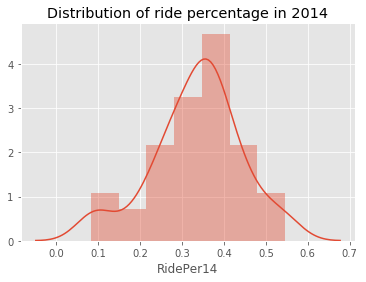

In [9]:
print('Mean', ridePer14Mean)
print('STD', ridePer14Std)
plt.title('Distribution of ride percentage in 2014')
sns.distplot(ridePercentage14)

In [10]:
mu = 0.5
stderr = calculate_stderr(ridePer14Std, len(riders2014))
tlab = calculate_tstat(ridePer14Mean, mu, stderr)
tlab

-10.053808694784662

In [11]:
confIntervlab = confidence_interval(ridePer14Mean, stderr)
confIntervlab 

# THE NULL HYPOTHESIS IS REJECTED

(0.30243192384647904, 0.36689664758209234)

## Problem Set

### Question 1
How much money do professional bull riders earn by participating in an event? (2012)



In [12]:
ridersIn12 = riderData[riderData['Events12'] > 0]
avg_earn_per_event = ridersIn12['Earnings12'] / ridersIn12['Events12']

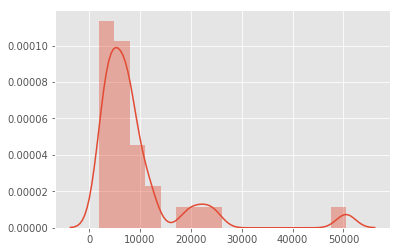

In [13]:
sns.distplot(avg_earn_per_event)

Log Mean 8.846387139242822
Log STD 0.7209061829799005


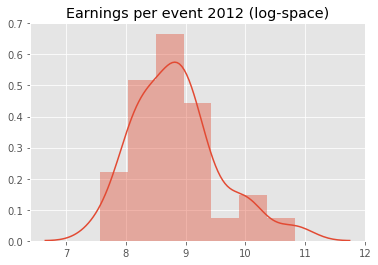

In [14]:
# Normalization with log
Log_avg_earn_per_event = np.log(avg_earn_per_event)

logEarningsMean = Log_avg_earn_per_event.mean()
logEarningsStd = Log_avg_earn_per_event.std()

print('Log Mean', logEarningsMean)
print('Log STD', logEarningsStd)

plt.title('Earnings per event 2012 (log-space)')
sns.distplot(Log_avg_earn_per_event)

In [15]:
# Estimation of population mean (logspace)
stderr = calculate_stderr(logEarningsStd, len(ridersIn12))
LogConfInterval_p1 = confidence_interval(logEarningsMean, stderr)
LogConfInterval_p1

(8.584004061055756, 9.108770217429887)

In [16]:
# True scale confidence interval
confInterval_p1 = np.exp(LogConfInterval_p1)



print(f'We can say with 95% confidence that the true population mean lays within {round(confInterval_p1[0], 2)} and {round(confInterval_p1[1], 2)}')

We can say with 95% confidence that the true population mean lays within 5345.47 and 9034.18


### Question 2


Students collected 8 random bags of a specific brand of potato chips and carefully weighed the contents of each bag, recording the following weights (in grams): 
 29.4      29.0      28.4      28.8      28.9      29.3      28.5      28.2 

The students want to test the claim that the mean weight of these bags is 28.5 grams.  They think it may be different. 

$H_{0}: \mu=28.5 \\ H_{a}: \mu \neq 28.5 \\ \alpha = 0.05 \implies t_{critical}=2.365$ 

In [17]:
sampleWeights = np.array([29.4, 29., 28.4, 28.8, 28.9, 29.3, 28.5, 28.2])
weightsMean = sampleWeights.mean()
weightsStd = sampleWeights.std(ddof=1)
print('Mean', weightsMean)
print('STD', weightsStd)

Mean 28.8125
STD 0.42573465914816017


In [18]:
mu = 28.5
stderr_p2 = calculate_stderr(weightsStd, len(sampleWeights))
tstat_p2 = calculate_tstat(weightsMean, mu, stderr_p2)

print('t:', tstat_p2)

# FAIL TO REJECT NULL HYPOTHESIS

t: 2.076136996343499


### Question 3

An industrial plant dumps its waste into a nearby river, but claims that it is not impacting the native species of frogs that live in the river.  The frogs are able to tolerate calcium concentrations up to 91 mg/L.  
You measure the concentration of calcium in 25 random samples from the river.  Your measurements are approximately normally distributed, with a mean of 93.6 mg/L, with a standard deviation of 7.8 mg/L.  

$H_{0}: \mu \leq 91 \\ H_{a}: \mu > 91 \\ \mu_{\bar{x}}= 93.6, 
n=25, s=7.8 \\ \alpha=0.05 \implies t_{critical}= 1.711 $

In [19]:
sampleMean_p3 = 93.6
sampleSize_p3 = 25
sampleStd_p3 = 7.8
mu_p3 = 91

stderr_p3 = calculate_stderr(sampleStd_p3, sampleSize_p3)
t_p3 = calculate_tstat(sampleMean_p3, mu_p3, stderr_p3 )

print('t:', t_p3)

# FAIL TO REJECT

t: 1.666666666666663


### Question 4

You are studying a population of peregrine falcons and want to estimate their average wingspan.  So you collect a random sample of 12 adult male birds and measure a mean wingspan of 42.6 cm, with a standard deviation of 5.3 cm. 
Assume that the distribution of measurements was approximately normal.

$\mu_{\bar{x}} = 42.6, s = 5.3, n = 12 \\ \alpha = 0.1 \implies t_{critical} = 1.796$

In [20]:
stderr_p4 = calculate_stderr(5.3, 12)
confInterval90_p4 = confidence_interval(42.6, stderr_p4, 1.796)
confInterval90_p4

(39.8521591288189, 45.347840871181106)